# **SPACESHIP TITANIC DATASET PREDICTION **

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))


In [3]:
df=pd.read_csv('/content/train.csv')

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Checking if any null value is present or not

In [7]:
df.isnull().sum()


,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [8]:
df.shape

(8693, 14)

In [9]:
df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Filling the null values within known range

In [10]:
df.Age=df.Age.interpolate()
df.RoomService=df.RoomService.interpolate()
df.FoodCourt=df.FoodCourt.interpolate()
df.ShoppingMall=df.ShoppingMall.interpolate()
df.VRDeck=df.VRDeck.interpolate()
df.Spa=df.Spa.interpolate()

In [11]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,0
VIP,203
RoomService,0
FoodCourt,0
ShoppingMall,0


In [12]:
cols = ['Name','Cabin','PassengerId']
df=df.drop(cols,axis=1)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7913 non-null   object 
 1   CryoSleep     7913 non-null   object 
 2   Destination   7913 non-null   object 
 3   Age           7913 non-null   float64
 4   VIP           7913 non-null   object 
 5   RoomService   7913 non-null   float64
 6   FoodCourt     7913 non-null   float64
 7   ShoppingMall  7913 non-null   float64
 8   Spa           7913 non-null   float64
 9   VRDeck        7913 non-null   float64
 10  Transported   7913 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [13]:
df.HomePlanet.unique()
df.CryoSleep.unique()
df.Destination.unique()
df.VIP.unique()

array([False, True], dtype=object)

Changing the data types

In [15]:
df.HomePlanet = df.HomePlanet.astype("string")
df.Destination = df.Destination.astype("string")
df.CryoSleep = df.CryoSleep.astype(float)
df.VIP = df.VIP.astype(float)
df.Transported = df.Transported.astype(int)

In [16]:
print(df.HomePlanet.dtype)
print(df.Destination.dtype)
print(df.CryoSleep.dtype)
print(df.VIP.dtype)
print(df.Transported.dtype)

string
string
float64
float64
int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7913 non-null   string 
 1   CryoSleep     7913 non-null   float64
 2   Destination   7913 non-null   string 
 3   Age           7913 non-null   float64
 4   VIP           7913 non-null   float64
 5   RoomService   7913 non-null   float64
 6   FoodCourt     7913 non-null   float64
 7   ShoppingMall  7913 non-null   float64
 8   Spa           7913 non-null   float64
 9   VRDeck        7913 non-null   float64
 10  Transported   7913 non-null   int64  
dtypes: float64(8), int64(1), string(2)
memory usage: 741.8 KB


Putting the dummy values

In [21]:
dummy = []
cols = ['HomePlanet','Destination']
for i in cols:
    dummy.append(pd.get_dummies(df[i]))
df_dummy = pd.concat(dummy,axis=1)
df_data = pd.concat((df,df_dummy),axis = 1)
df_data = df_data.drop(cols,axis=1)
df_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Earth', 'Europa', 'Mars',
       '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'],
      dtype='object')

In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      7913 non-null   float64
 1   Age            7913 non-null   float64
 2   VIP            7913 non-null   float64
 3   RoomService    7913 non-null   float64
 4   FoodCourt      7913 non-null   float64
 5   ShoppingMall   7913 non-null   float64
 6   Spa            7913 non-null   float64
 7   VRDeck         7913 non-null   float64
 8   Transported    7913 non-null   int64  
 9   Earth          7913 non-null   boolean
 10  Europa         7913 non-null   boolean
 11  Mars           7913 non-null   boolean
 12  55 Cancri e    7913 non-null   boolean
 13  PSO J318.5-22  7913 non-null   boolean
 14  TRAPPIST-1e    7913 non-null   boolean
dtypes: boolean(6), float64(8), int64(1)
memory usage: 710.9 KB


Dividing the data into independent and dependent features

In [23]:
y = df_data.Transported
df_data = df_data.drop('Transported',axis = 1)
X = df_data

Modelling the dataset and Splitting of dataset

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)

Random Forest Classifier

In [25]:
rf_model = RandomForestClassifier(random_state = 1)

rf_model.fit(train_X.values,train_y.values)
prediction = rf_model.predict(val_X.values)

Model Evaluation

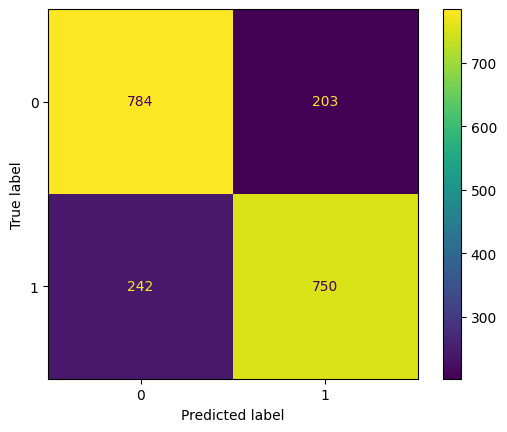

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
titanic_confusion_matrix = confusion_matrix(val_y,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=titanic_confusion_matrix)
disp.plot()
plt.show()

In [27]:
accuracy = accuracy_score(val_y,prediction)
print(accuracy)

0.7751389590702374
